In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/titanic-training-data.csv")

In [3]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.150,NaN,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.750,NaN,Q
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.000,B96 B98,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.500,NaN,S
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.000,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.000,NaN,S
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.750,NaN,Q
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

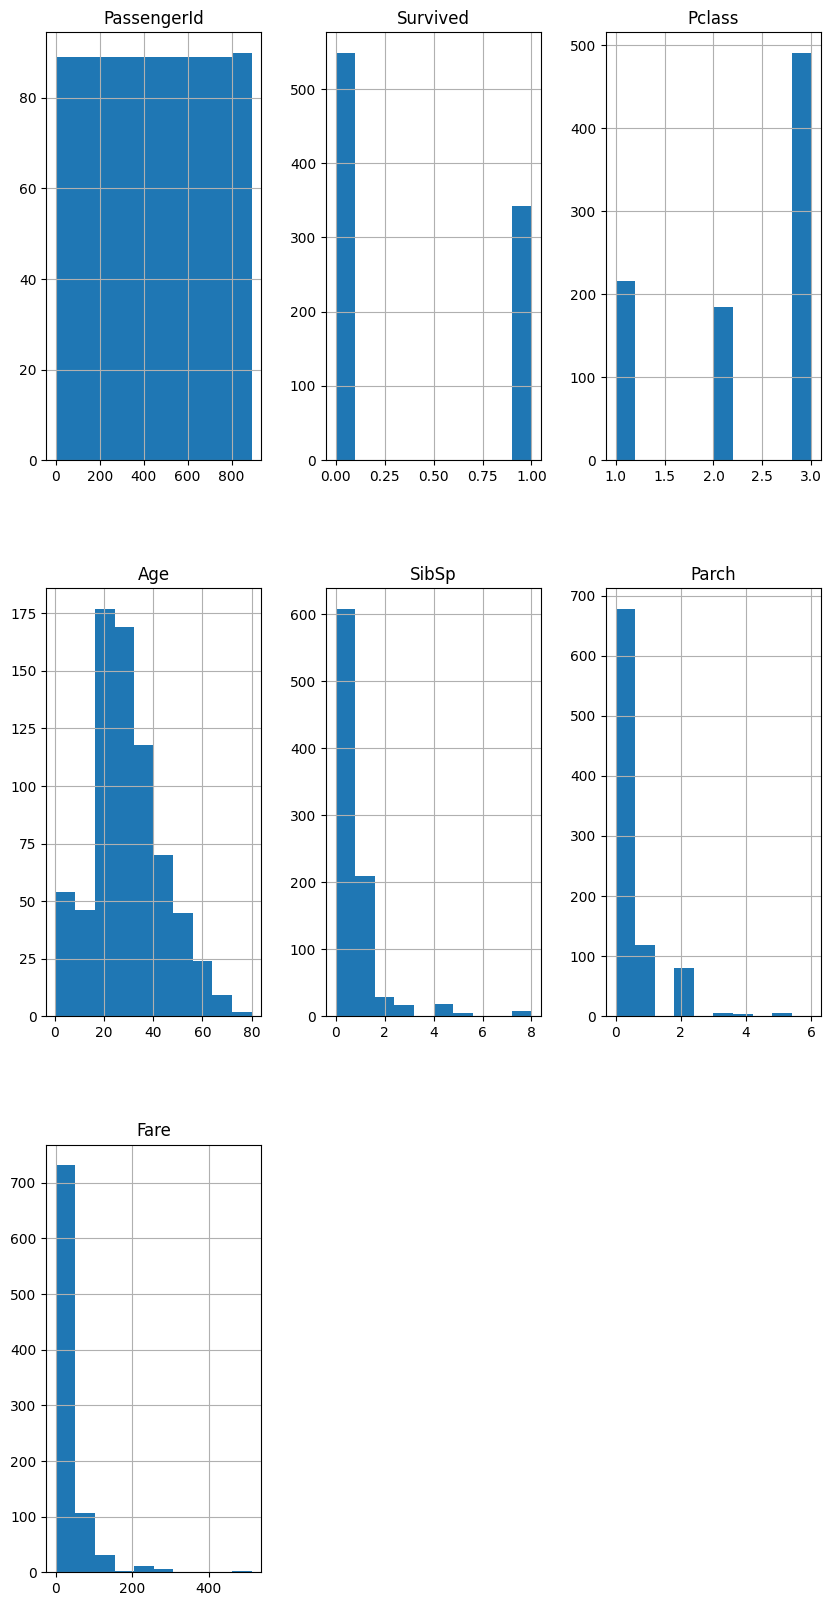

In [8]:
df.hist(figsize=(10,20))

<AxesSubplot: >

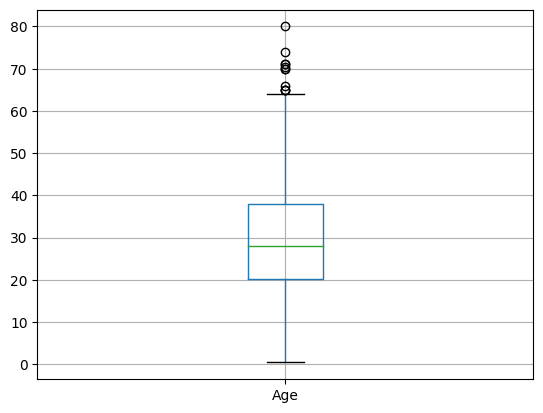

In [9]:
df.boxplot(column=['Age'])

<AxesSubplot: >

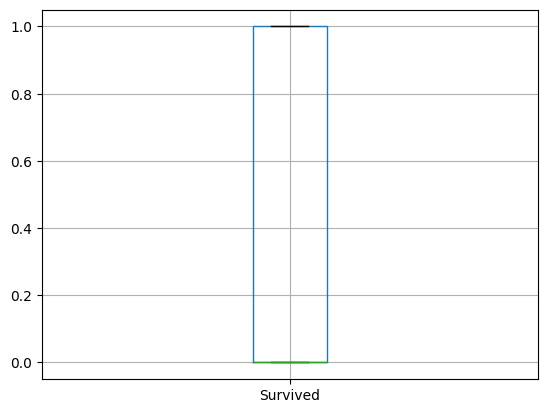

In [10]:
df.boxplot(column=["Survived"])

In [11]:
median_age=df['Age'].median()
median_age

28.0

In [12]:
df["Age"].fillna(median_age,inplace=True)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
mode_embarked=df["Embarked"].mode()
mode_embarked

0    S
Name: Embarked, dtype: object

In [15]:
mode_embarked=df["Embarked"].value_counts(dropna=True).idxmax()
mode_embarked

'S'

In [16]:
df["Embarked"].fillna(mode_embarked,inplace=True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### We have to drop the value of Cabin as it has more missing value

In [18]:
df["Embarked"]=df["Embarked"].replace({'S':"Ship",'Q':"QueenShip",'C':"Coach_Ship"})

In [19]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,Ship
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.00,1,2,220845,65.0000,NaN,Ship
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.00,0,2,F.C.C. 13529,26.2500,NaN,Ship
65,66,1,3,"Moubarek, Master. Gerios",male,28.00,1,1,2661,15.2458,NaN,Coach_Ship
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.00,0,0,A/5 3594,8.0500,NaN,Ship
417,418,1,2,"Silven, Miss. Lyyli Karoliina",female,18.00,0,2,250652,13.0000,NaN,Ship
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.00,0,0,382651,7.7500,NaN,QueenShip
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.00,0,0,347078,7.7500,NaN,Ship
557,558,0,1,"Robbins, Mr. Victor",male,28.00,0,0,PC 17757,227.5250,NaN,Coach_Ship
773,774,0,3,"Elias, Mr. Dibo",male,28.00,0,0,2674,7.2250,NaN,Coach_Ship


In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Ship
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Coach_Ship
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Ship
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Ship
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Ship


In [21]:
### one hot encoding
df=pd.get_dummies(df,columns=["Embarked"])

In [22]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Coach_Ship,Embarked_QueenShip,Embarked_Ship
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,0,0,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,28.0,0,0,330959,7.8792,NaN,0,1,0
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,0,0,1
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,0,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,0,0,1
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,0,0,1
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,0,0,1
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,0,0,1
776,777,0,3,"Tobin, Mr. Roger",male,28.0,0,0,383121,7.7500,F38,0,1,0
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,1,0,0


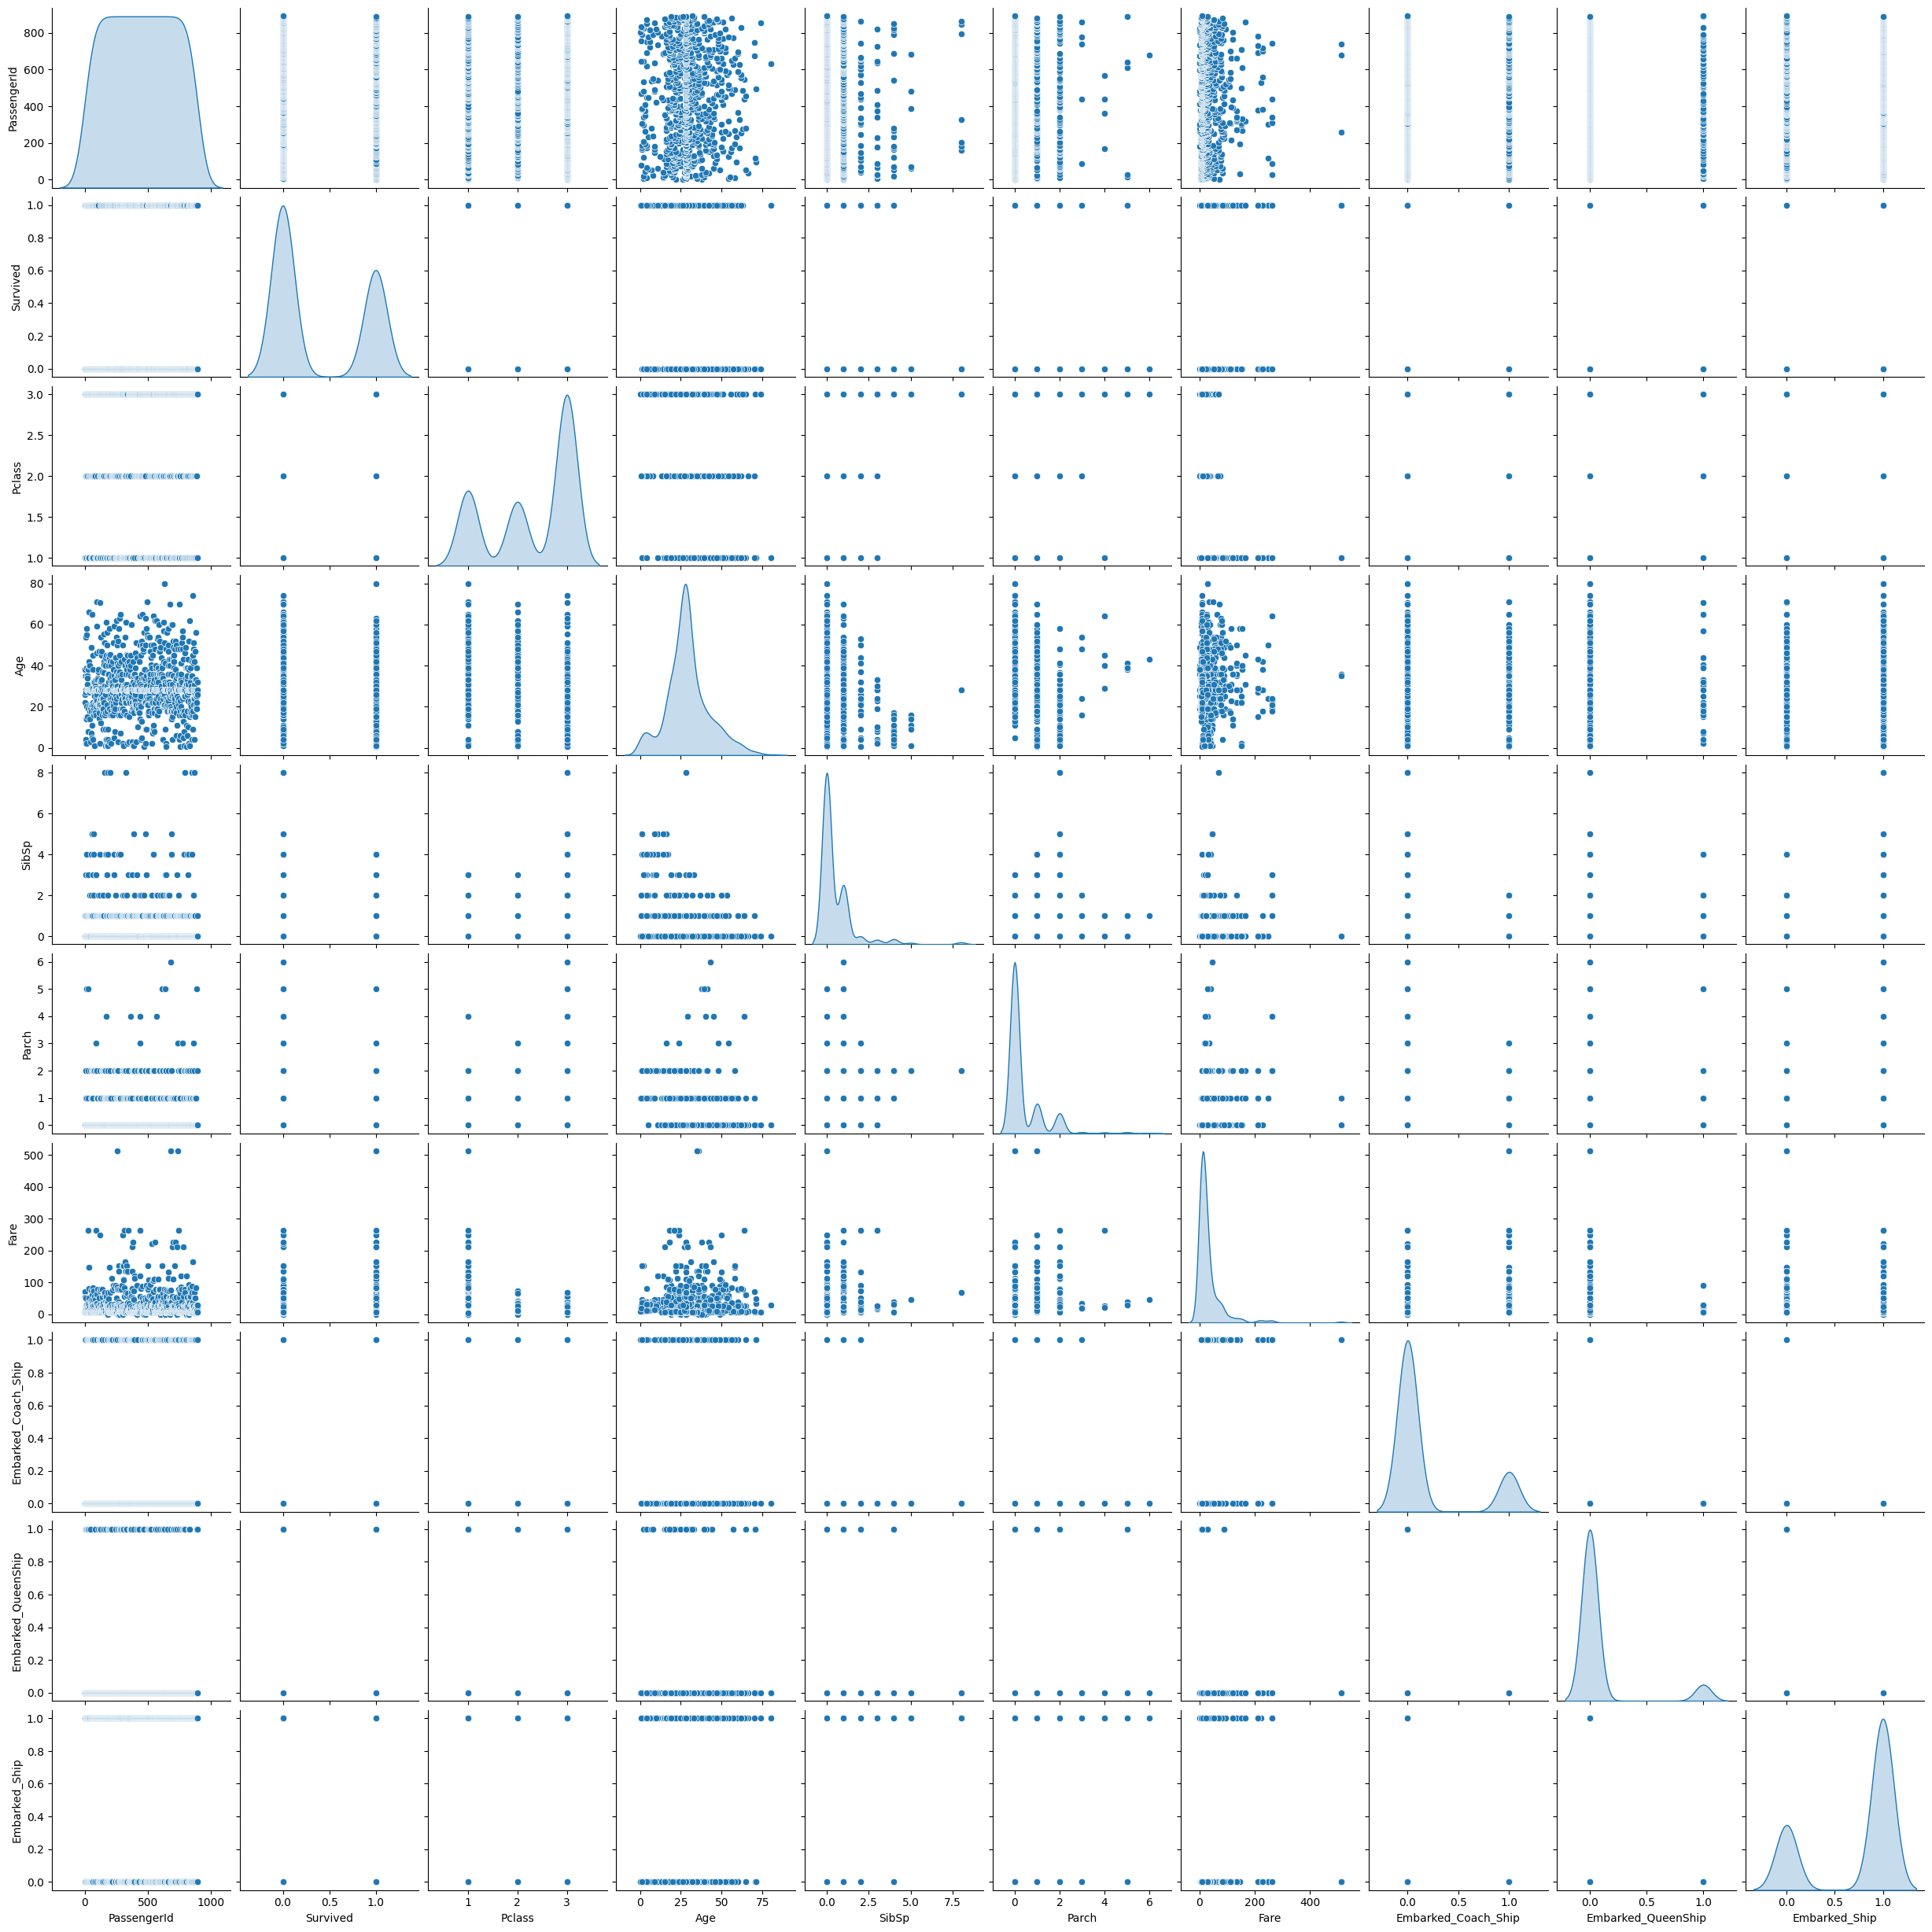

In [23]:
sns.pairplot(df,diag_kind="kde")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    object 
 4   Sex                  891 non-null    object 
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    object 
 9   Fare                 891 non-null    float64
 10  Cabin                204 non-null    object 
 11  Embarked_Coach_Ship  891 non-null    uint8  
 12  Embarked_QueenShip   891 non-null    uint8  
 13  Embarked_Ship        891 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [25]:
df.drop("Name",axis=1,inplace=True)

In [26]:
df.drop("Sex",axis=1,inplace=True)

In [27]:
df.drop("Ticket",axis=1,inplace=True)

In [28]:
df.drop("Cabin",axis=1,inplace=True)

In [29]:
df.dtypes

PassengerId              int64
Survived                 int64
Pclass                   int64
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked_Coach_Ship      uint8
Embarked_QueenShip       uint8
Embarked_Ship            uint8
dtype: object

In [30]:
df.drop("PassengerId",axis=1,inplace=True)

In [31]:
df.dtypes

Survived                 int64
Pclass                   int64
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked_Coach_Ship      uint8
Embarked_QueenShip       uint8
Embarked_Ship            uint8
dtype: object

In [32]:
#### Logistic Regression
x=df.drop(["Survived"],axis=1)
y=df[["Survived"]]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)

model_1=LogisticRegression()
model_1.fit(x_train,y_train)

In [34]:
model_1=LogisticRegression() 
model_1.fit(x_train,y_train)

LogisticRegression()

In [35]:
model_1.score(x_train,y_train)

0.717852684144819

model_1.score(x_test,y_test)

In [40]:
model_1.score(x_test,y_test)

0.7111111111111111

In [41]:
prediction=model_1.predict(x_test)

In [42]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7111111111111111

In [48]:
from sklearn import metrics

In [50]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78        53
           1       0.74      0.46      0.57        37

    accuracy                           0.71        90
   macro avg       0.72      0.67      0.68        90
weighted avg       0.72      0.71      0.69        90



In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[47,  6],
       [20, 17]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.70      0.89      0.78        53\n           1       0.74      0.46      0.57        37\n\n    accuracy                           0.71        90\n   macro avg       0.72      0.67      0.68        90\nweighted avg       0.72      0.71      0.69        90\n'

<AxesSubplot: >

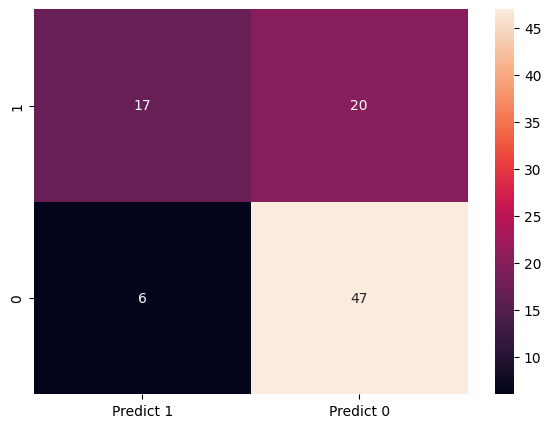

In [57]:
#### Heat Map
cm=metrics.confusion_matrix(y_test,prediction,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [58]:
#### m[0][0]=TP   -->Total=17 true positive number. 
#### m[0][1]=FN   -->Total=20 false negative number. 
#### m[1][0]=FP   -->Total=6 false positive number. 
#### [1][1]=TN    -->Total=47 true negaitive number. 

#### END